Importando as Bibliotecas que serão utilizadas no Projeto 4

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

Carregando a imagem 


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

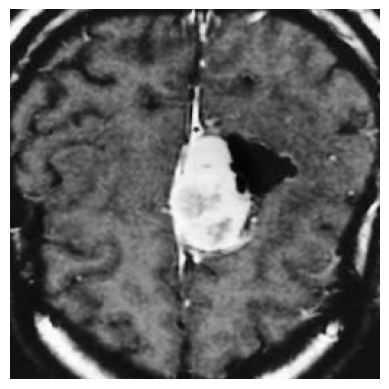

In [3]:
imagem_tumor = cv2.imread('Tumor (194).jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagem_tumor, cmap = 'gray')
plt.axis('off')

Suavizar a imagem com a técnica da mediana

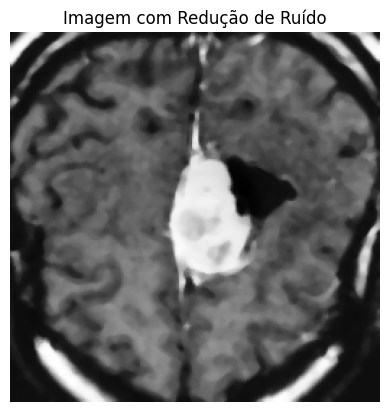

In [10]:
imagem_suavizada = cv2.medianBlur(imagem_tumor, 5)
plt.imshow(imagem_suavizada, cmap='gray')
plt.title('Imagem com Redução de Ruído')
plt.axis('off')
plt.show()

Manipulando bordas da imagem com tratamento da Mediana

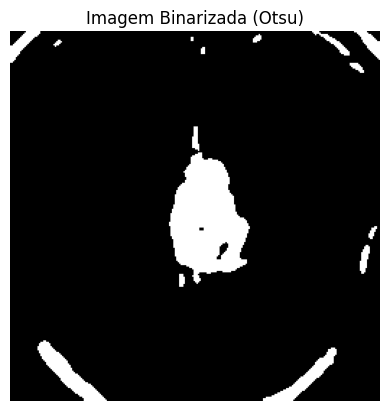

In [5]:
_, imagem_binaria = cv2.threshold(imagem_suavizada, 180, 255, cv2.THRESH_BINARY)
plt.imshow(imagem_binaria, cmap='gray')
plt.title('Imagem Binarizada (Otsu)')
plt.axis('off')
plt.show()

Contornar a parte do tumor na imagem binarizada

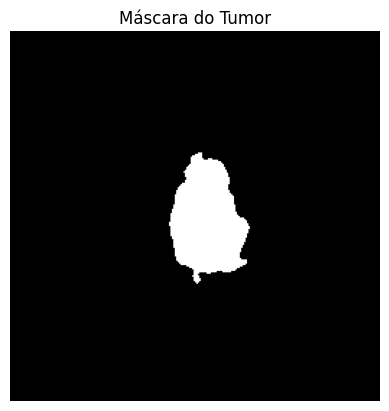

In [6]:
contornos, _ = cv2.findContours(imagem_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

maior_contorno = max(contornos, key=cv2.contourArea)

mascara_tumor = np.zeros_like(imagem_binaria)
cv2.drawContours(mascara_tumor, [maior_contorno], -1, 255, thickness=cv2.FILLED)

plt.imshow(mascara_tumor, cmap='gray')
plt.title('Máscara do Tumor')
plt.axis('off')
plt.show()


Aplicar a parte da máscara do Tumor em cima da imagem original

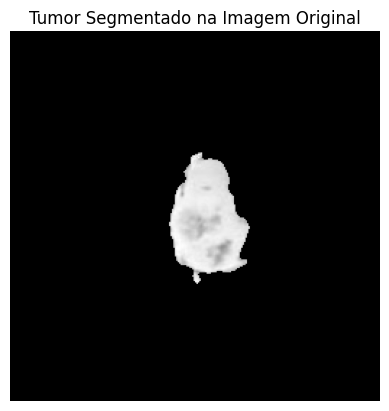

In [7]:

tumor_segmentado = cv2.bitwise_and(imagem_tumor, imagem_tumor, mask=mascara_tumor)

plt.imshow(tumor_segmentado, cmap='gray')
plt.title('Tumor Segmentado na Imagem Original')
plt.axis('off')
plt.show()


Todas as imagens 

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

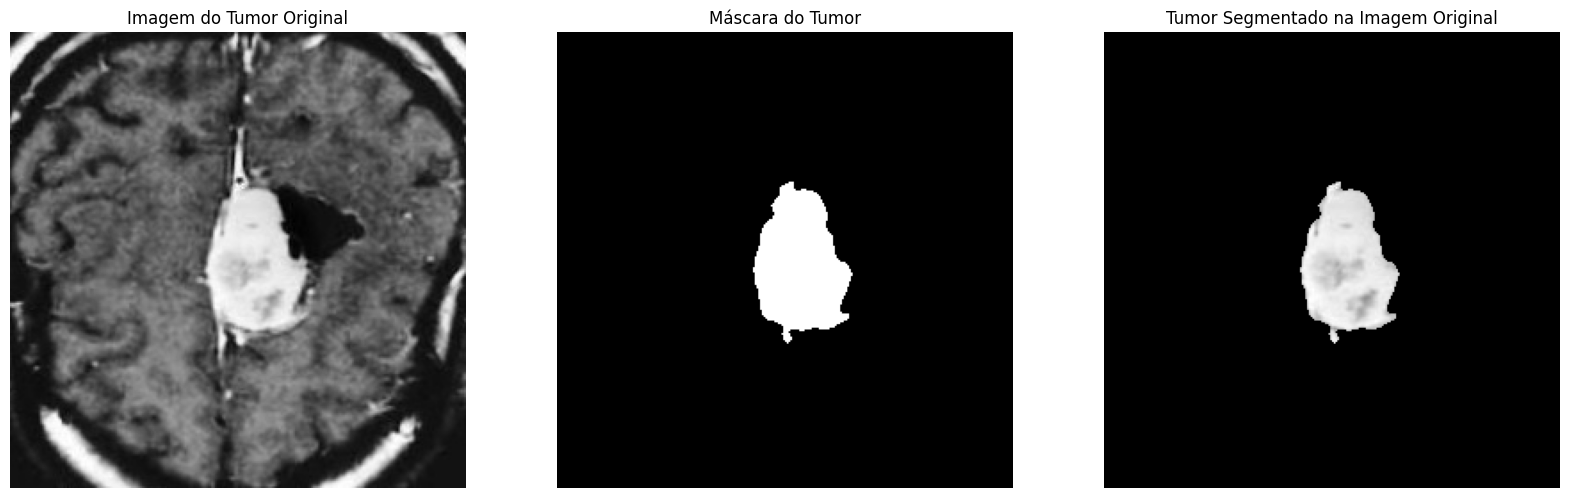

In [8]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.imshow(imagem_tumor, cmap='gray')
plt.title('Imagem do Tumor Original')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Máscara do Tumor')
plt.imshow(mascara_tumor, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Tumor Segmentado na Imagem Original')
plt.imshow(tumor_segmentado, cmap='gray')
plt.axis('off')